In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Lojistik Regresyon

In [6]:
diabetes = pd.read_csv("diabetes.csv")

In [7]:
df = diabetes.copy()

In [9]:
df = df.dropna()

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


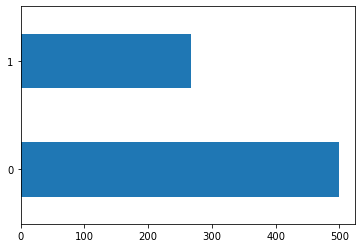

In [13]:
df["Outcome"].value_counts().plot.barh();

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [15]:
y = df["Outcome"]

In [16]:
X = df.drop(["Outcome"],axis=1)

In [17]:
loj = sm.Logit(y,X)

In [18]:
loj_model = loj.fit()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


In [19]:
loj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                 0.05922
Time:                        11:31:07   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
loj = LogisticRegression(solver="liblinear")

In [22]:
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [23]:
loj_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
loj_model.intercept_

array([-5.89175767])

In [25]:
y_pred = loj_model.predict(X)

In [26]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [27]:
accuracy_score(y,y_pred)

0.7747395833333334

In [29]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [32]:
loj_model.predict_proba(X)[:10][:,0:1]

array([[0.35040373],
       [0.91702224],
       [0.22474194],
       [0.92139118],
       [0.16722986],
       [0.7989895 ],
       [0.88019422],
       [0.27812572],
       [0.3206045 ],
       [0.92273361]])

In [33]:
loj_model.predict(X)[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [44]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [45]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [47]:
y_pred[:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

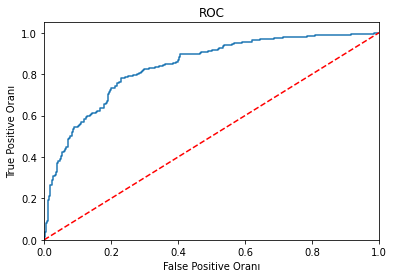

In [48]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)


In [51]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [54]:
accuracy_score(y_test,loj_model.predict(X_test))

0.75

In [56]:
cross_val_score(loj_model,X_test, y_test,cv=10).mean()

0.7397368421052632

In [57]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [58]:
from sklearn.naive_bayes import GaussianNB 

In [59]:
nb = GaussianNB()
nb_model = nb.fit(X_train,y_train)
nb_model

GaussianNB()

In [60]:
nb_model.predict(X_test)[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [64]:
nb_model.predict_proba(X_test)[:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [65]:
y_pred = nb_model.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred)

0.7445887445887446

In [67]:
cross_val_score(nb_model,X_test,y_test,cv=10).mean()

0.775

In [68]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier()

In [71]:
knn_model = knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier()

In [72]:
y_pred = knn_model.predict(X_test)

In [73]:
accuracy_score(y_test,y_pred)

0.6883116883116883

In [74]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.75      0.76       151\n           1       0.55      0.56      0.56        80\n\n    accuracy                           0.69       231\n   macro avg       0.66      0.66      0.66       231\nweighted avg       0.69      0.69      0.69       231\n'

In [75]:
knn_params = {"n_neighbors" : np.arange(1,50,1)}

In [76]:
knn = KNeighborsClassifier()

In [77]:
knn_cv = GridSearchCV(knn,knn_params,cv=10)

In [78]:
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [79]:
knn_cv.best_params_

{'n_neighbors': 11}

In [81]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train,y_train)

In [84]:
knn_tuned.score(X_test,y_test)

0.7316017316017316

In [85]:
 df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [86]:
svm_model = SVC(kernel="linear").fit(X_train,y_train)

In [87]:
y_pred = svm_model.predict(X_test)

In [89]:
accuracy_score(y_test,y_pred)

0.7445887445887446

In [90]:
svc_params = {"C" : np.arange(1,10)}

In [91]:
svc = SVC(kernel="linear")

In [93]:
svc_cv_model = GridSearchCV(svc,svc_params,cv=10,n_jobs= -1,verbose=2)

In [94]:
svc_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [95]:
svc_cv_model.best_params_

{'C': 1}

In [102]:
svc_tuned = SVC(kernel="linear" , C = 1).fit(X_train,y_train)

In [103]:
y_pred = svc_tuned.predict(X_test)

In [104]:
svc_tuned.score(X_train,y_train)

0.7802607076350093

In [105]:
 df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [106]:
svc_model = SVC(kernel= "rbf").fit(X_train,y_train)

In [107]:
svc_model

SVC()

In [108]:
y_pred=svc_model.predict(X_test)

In [110]:
accuracy_score(y_test,y_pred)

0.7359307359307359

In [111]:
svc_params = {"C" : [0.001,0.001,0.1,1,5,50,100],
             "gamma" : [0.001,0.001,0.1,1,5,50,100]}

In [112]:
svc = SVC()
svc_cv_model = GridSearchCV(svc,svc_params,cv = 10,n_jobs=-1,verbose=2)

In [113]:
svc_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.001, 0.1, 1, 5, 50, 100],
                         'gamma': [0.001, 0.001, 0.1, 1, 5, 50, 100]},
             verbose=2)

In [114]:
svc_cv_model.best_params_

{'C': 1, 'gamma': 0.001}

In [115]:
svc_tuned = SVC(C = 1, gamma = 0.001).fit(X_train, y_train)

In [116]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7056277056277056

In [117]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()

In [121]:
scaler.fit(X_train)

StandardScaler()

In [122]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
from sklearn.neural_network import MLPClassifier

In [125]:
mlpc = MLPClassifier().fit(X_train_scaled,y_train)

In [127]:
y_pred = mlpc.predict(X_test_scaled)

In [128]:
accuracy_score(y_test,y_pred)

0.7316017316017316

In [129]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [130]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [147]:
mlpc_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (100, 100),
 'solver': 'sgd'}

In [148]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.01, 
                           hidden_layer_sizes = (100, 100),
                          solver = "sgd")


In [149]:
mlpc_tuned.fit(X_train_scaled,y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 100), solver='sgd')

In [150]:
y_pred = mlpc_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.3463203463203463

In [192]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [193]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
cart = DecisionTreeClassifier()

In [195]:
cart_model = cart.fit(X_train,y_train)

In [196]:
cart_model

DecisionTreeClassifier()

In [197]:
from skompiler import skompile

In [198]:
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[2] <= 65.0 else 0) if
    x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 0 if x[3] <= 40.5 else 1) if x[5] <= 49.10000038146973 else 1) if
    x[1] <= 127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 1 if 
    x[5] <= 28.149999618530273 else 0) if x[5] <= 30.300000190734863 else 1 if
    x[5] <= 32.000000953674316 else ((0 if x[5] <= 33.75 else 1) if x[0] <=
    0.5 else 1 if x[5] <= 32.45000076293945 else 0) if x[2] <= 85.0 else 1) if
    x[7] <= 28.5 else (1 if x[7] <= 29.5 else (1 if x[7] <= 61.5 else 0) if
    x[5] <= 9.649999618530273 else 0 if x[1] <= 133.0 else (0 if x[6] <= 
    0.21400000154972076 else 1) if x[2] <= 73.0 else 0) if x[5] <= 
    26.949999809265137 

In [173]:
x = [5]

In [199]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7186147186147186

In [200]:
cart_model

DecisionTreeClassifier()

In [201]:
cart_grid = {"max_depth" : range(1,10),"min_samples_split" : range(2,52)}

In [202]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


In [203]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 19}

In [204]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [205]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [206]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [208]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [209]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

In [211]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [212]:
rf = RandomForestClassifier()

In [213]:
rf_cv_model = GridSearchCV(rf,rf_params,cv=10,n_jobs=-1)

In [214]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]})

In [215]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 500}

In [226]:
rf_tuned = RandomForestClassifier(n_estimators= 500,max_depth=10,max_features=8,min_samples_split=2,random_state=42)

In [227]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, n_estimators=500,
                       random_state=42)

In [228]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [230]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

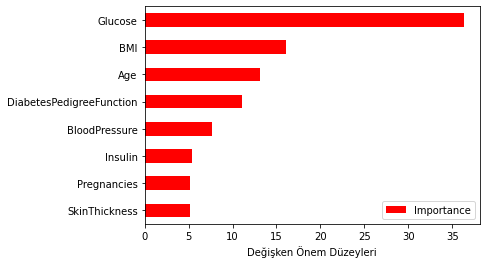

In [231]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [232]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [233]:
from sklearn.ensemble import GradientBoostingClassifier

In [234]:
gbm_model = GradientBoostingClassifier().fit(X_train,y_train)

In [235]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [238]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [239]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [240]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [241]:
gbm_cv.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [252]:
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.05, 
                                 max_depth = 5,
                                min_samples_split = 10,
                                n_estimators = 100,
                                      random_state=42)

In [253]:
gbm_tuned.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                           min_samples_split=10, random_state=42)

In [254]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

In [255]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [256]:
from lightgbm import LGBMClassifier

In [257]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [258]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

In [259]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [260]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

In [261]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [262]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [290]:
lgbm = LGBMClassifier(learning_rate = 0.05, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 100,
                       min_child_samples = 20,
                     random_state=42)

In [291]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [292]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489